## Comparison between the FFT mode and the non-unifrom FFT mode for the pseudo Wigner distribution 

In [5]:
using Winston;
using Color;
import DSP
using PyPlot

In [2]:
include("../juwvid.jl")

juwvid

In [6]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/365,1.0,365.0);
z=DSP.Util.hilbert(ys);

### the Pseudo Wigner Ville distribution with FFT

Single pseudo Wigner Ville
Use fft.


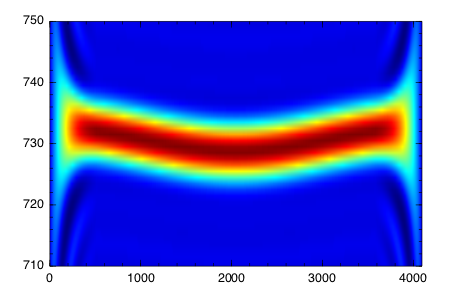

In [13]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0);
imagesc(real(tfrpf[end:-1:1,:]));Winston.ylim(710,750)

In [14]:
indf=extif.maxif(abs(tfrpf));
dx=xs[2]-xs[1]
fx=juwutils.index_to_frequency(indf,NaN,dx,nsample);

### the Pseudo Wigner-Ville with NUFFT

Single pseudo Wigner Ville
Use nufft.


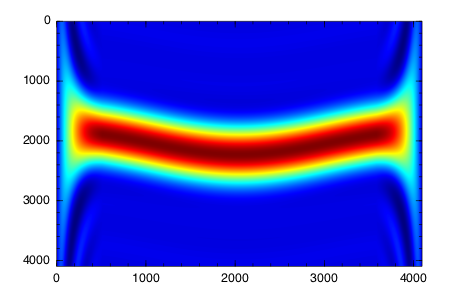

In [16]:
fin=collect(linspace(710,750,nsample));
tfrpfn=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0);
imagesc(real(tfrpfn[end:-1:1,:]))

In [17]:
indfn=extif.maxif(abs(tfrpfn));
fn=juwutils.index_to_frequency(indfn, fin, dx,nsample);

### the Wigner-Ville distribution with NUFFT

Single Wigner Ville
Use nufft.


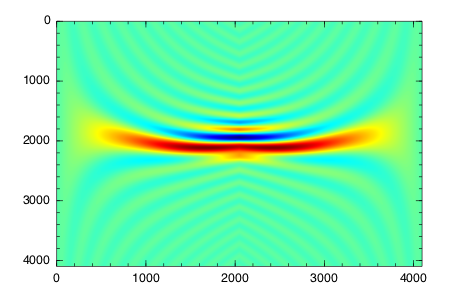

In [20]:
fin=collect(linspace(710,750,nsample));
tfrwv=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0);
imagesc(real(tfrwv[end:-1:1,:]))

In [21]:
indfwv=extif.maxif(abs(tfrwv));
fwv=juwutils.index_to_frequency(indfwv, fin, dx,nsample);

### comparison of the extracted IFs
- the red curve corresponds to the input IF, gray is the pseudo Wigner-Ville with FFT, green is the Wigner Ville distribution with NUFFT, and blue is the pseudo Wigner-Ville with NUFFT.  
- The NUFFT is necessary. 
- The Wigner Ville Distribution has large bias for the non-linear FM. 
- The pseudo Wigner-Ville with NUFFT provides us the IF with the sufficient resolution.

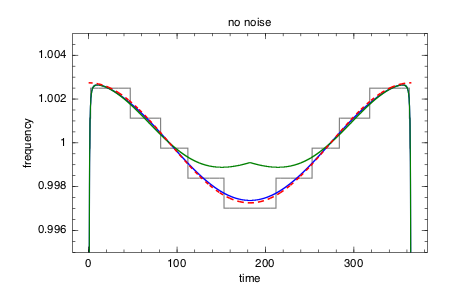

In [25]:
p = FramedPlot(
title="no noise",
xlabel="time",
ylabel="frequency",
yrange=(0.995,1.005)
);
add(p, Curve(xs,fx, color="gray",width=3))
add(p, Curve(xs,fn, color="blue",width=3))
add(p, Curve(xs,fwv, color="green",width=3))
add(p, Curve(xs,iws/(2*pi), color="red", kind="dash",width=4))